- # Integração Arduino com Python
***

- #### Add from Arduino import Arduino into your python script to communicate with your Arduino.

In [1]:
from Arduino import Arduino
import time
import json
import requests
from datetime import datetime

In [2]:
def easy_datetime(type: str):
    full_date = str(datetime.today())

    if type == 'full':
        return full_date
    elif type == 'year':
        return int(full_date[:4])
    elif type == 'month':
        return int(full_date[5:7])
    elif type == 'day':
        return int(full_date[8:10])
    elif type == 'hour':
        return int(full_date[11:13])
    elif type == 'minute':
        return int(full_date[14:16])
    elif type == 'second':
        return int(full_date[17:19])
    else:
        return None

***
- ## Definindo variáveis

In [3]:
green_led, red_led = 13, 7
detector_pin = 3

***
- ## void setup()

In [8]:
board = Arduino("9600", port="/dev/ttyACM1") # plugged in via USB, serial com at rate 9600

board.pinMode(detector_pin, "INPUT") # Configures DETECTOR pin as input
board.pinMode(green_led, "OUTPUT") # Configures LED pin as output
board.pinMode(red_led, "OUTPUT") # Configures LED pin as output

You need to update the version of the Arduino-Python3 library running on your Arduino.
The Arduino sketch is version
The Python installation is V0.6
Flash the prototype sketch again.


***

- ## void loop()

In [9]:
URL = 'http://127.0.0.1:5000/'
board.digitalWrite(green_led, "LOW")
board.digitalWrite(red_led, "LOW")

In [11]:
while True:

    if (
        board.digitalRead(detector_pin) and
        ( 
            easy_datetime('hour') > 8 and
            easy_datetime('hour') < 19
        )
    ):
        
        board.digitalWrite(green_led, "LOW")
        board.digitalWrite(red_led, "HIGH")

        body_presence = {
            "date_time_sent": str(datetime.today()),
            "sensor_id": "AUPS1",
            "detection": 1
        }
        
        post = requests.request('POST', URL + '/presence', json=body_presence)
        time.sleep(60)

    else:

        board.digitalWrite(red_led, "LOW")
        board.digitalWrite(green_led, "HIGH")

        body_presence = {
            "date_time_sent": str(datetime.today()),
            "sensor_id": "AUPS1",
            "detection": 0
        }

        post = requests.request('POST', URL + '/presence', json=body_presence)
        time.sleep(2)


KeyboardInterrupt: 

- ## *Delete* presence-lines from database

In [75]:
delete_data_from_table = requests.request('DELETE', URL + '/presences')
delete_data_from_table

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: //presences (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f9bff4a9a90>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [ ]:
body_presence = {
    "date_time_sent": str(datetime.today()),
    "sensor_id": "AUPS1",
    "detection": 0
}

post = requests.request('POST', URL + '/presence', json=body_presence)

/home/judassado/Desktop/my_workspace/creative-personal-projects/arduino/1-python-arduino/ambvir/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:xlabel='date_time_sent'>

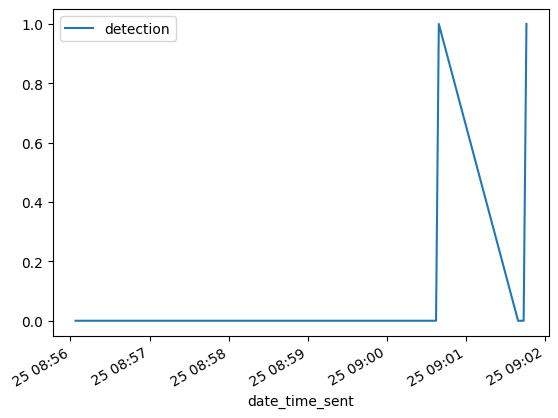

In [12]:
import pandas as pd
import matplotlib

URL = 'http://127.0.0.1:5000/'

body = {
    'day_min': 25,
    'day_max': 25
}

get = requests.request('GET', URL + '/presences', params=body)
response_json = get.json()



df = pd.DataFrame.from_dict(response_json)

df_filter = df[['date_time_sent', 'detection']]

df_filter['date_time_sent'] = pd.to_datetime(df_filter['date_time_sent'])
#df_filter
df_filter.plot(x='date_time_sent', y='detection', kind='line')

